# Reading Data Using Pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
import os
os.chdir("drive/My Drive/Lab3/")

###  1. Working with Headers When Reading Data from a CSV File

1. read the example .csv file (with a header) using the following code and examine the resulting DataFrame

In [ ]:
import numpy as np
import pandas as pd
df1 = pd.read_csv("./datasets/CSV_EX_1.csv")
df1

In [ ]:
#Display the first 10 records
# <your code goes here>

In [ ]:
#Display the last 5 records

In [ ]:
#Identify the type of df object
type(df1)

In [ ]:
#Check the type of a column "Sq. foot"
df1[' Sq. foot'].dtypes


In [ ]:
#List the types of all columns
df1.dtypes


In [ ]:
#List the column names
df1.columns

In [ ]:
#Number of dimensions
df1.ndim

In [ ]:
#Total number of elements in the Data Frame
df1.size

In [ ]:
#Number of rows and columns
print(df1.shape)
a,b = df1.shape
print(a*b)

2. Read a .csv file with no header using a pandas DataFrame:

In [ ]:
df2 = pd.read_csv("./datasets/CSV_EX_2.csv")
df2

The top data row has been mistakenly read as the column header. You can specify header=None to avoid this.
3. Read the .csv file by setting the header to None, as follows:

In [ ]:
df2 = pd.read_csv("./datasets/CSV_EX_2.csv",header=None)
df2

This may be fine for data analysis purposes, but if you want the DataFrame to have meaningful headers, then you will have to add them using the names argument.
4. Add the names argument to get the correct headers:

In [ ]:
df2 = pd.read_csv("./datasets/CSV_EX_2.csv",header=None, names=['Bedroom','Sq.ft','Locality','Price($)'])
df2

***

### 2. Reading from a CSV File Where Delimiters Are Not Commas
It is fairly common to encounter raw data files where the separator/delimiter is a character and not a comma. This exercise will demonstrate how you can read data from a file in such a case.

1. Read a .csv file using pandas DataFrames:

In [ ]:
import pandas as pd
df3 = pd.read_csv("./datasets/CSV_EX_3.csv")
df3

Clearly, the ; separator was not expected, and the reading is flawed. A simple workaround is to specify the separator/delimiter explicitly in the read function.
2. Specify the delimiter:

In [ ]:
df3 = pd.read_csv("./datasets/CSV_EX_3.csv",sep=';')
df3

***

### 3. Bypassing and Renaming the Headers of a CSV File
This exercise will demonstrate how to bypass the headers of a CSV file and put in your own. To do that, you have to specifically set header=0. If you try to set the names variable to your header list, unexpected things can happen. Follow these steps:

1. Add names to a .csv file that has headers, as follows:

In [ ]:
import pandas as pd
df4 = pd.read_csv("./datasets/CSV_EX_1.csv",names=['A','B','C','D'])
df4

2. To avoid this, set header to zero and provide a names list:

In [ ]:
df4 = pd.read_csv("./datasets/CSV_EX_1.csv",header=0,names=['A','B','C','D'])
df4

***

### 4. Skipping Initial Rows and Footers When Reading a CSV File

In this exercise, we will skip the first few rows because, most of the time, the first few rows of a CSV data file are metadata about the data source or similar information, which is not read into the table. Also, we will go ahead and remove the footer of the file, which might sometimes contain information that's not very useful. Let's see how we can do that using the example shown in the following screenshot:


# New Section
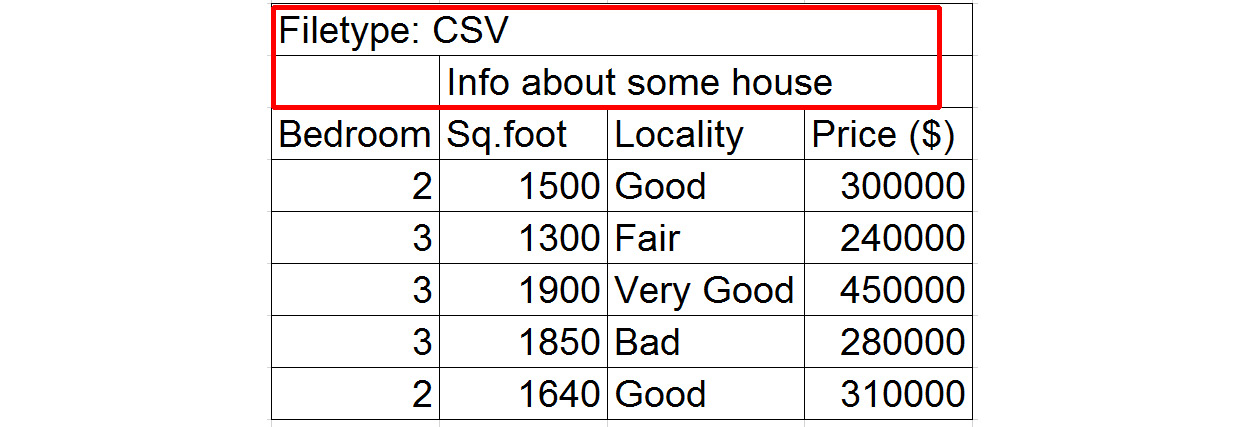

The first two lines in the CSV file are irrelevant data.
1. Read the CSV file and examine the results:

In [ ]:
import pandas as pd
df5 = pd.read_csv("./datasets/CSV_EX_skiprows.csv")
df5

2. Skip the first two rows and read the file:

In [ ]:
df5 = pd.read_csv("./datasets/CSV_EX_skiprows.csv",skiprows=2)
df5

Similar to skipping the initial rows, it may be necessary to skip the footer of a file. For example, we do not want to read the data at the end of the following file:
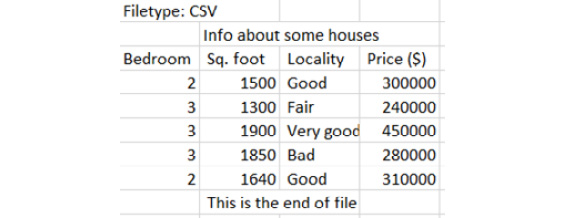

We have to use skipfooter and the engine='python' option to enable this. There are two engines for these CSV reader functions, based on C or Python, of which only the Python engine supports the skipfooter option.

3. Use the skipfooter option in Python:

In [ ]:
df6 = pd.read_csv("./datasets/CSV_EX_skipfooter.csv",skiprows=2,
skipfooter=1,engine='python')
df6

We've now seen how to read values skipping the headers and footers from a file. It can very often be very handy while dealing with data collected from several different sources, especially in situations where a file contains unnecessary and junk information.

***

### Reading Only the First N Rows
 we may just want to read the first couple of hundred rows to check an initial pattern and then decide to read the whole of the data afterward. Reading the entire file can take a long time and can slow down the entire data wrangling pipeline.

A simple option, called nrows, in the read_csv function, enables us to do just that. We will specify the number of rows we want to read and pass it as an argument to nrows like so:

In [ ]:
df7 = pd.read_csv("./datasets/CSV_EX_1.csv",nrows=2)
df7

***

### 5. Combining skiprows and nrows to Read Data in Small Chunks
This exercise will demonstrate how we can read from a very large data file. To do that, we can cleverly combine skiprows and nrows to read in a large file in small chunks of pre-determined sizes.

In [ ]:
#Create a list where DataFrames will be stored:
list_of_dataframe = []
#Store the number of rows to be read into a variable:
rows_in_a_chunk = 10
#Create a variable to store the number of chunks to be read:
num_chunks = 5

1. Create a dummy DataFrame to get the column names:

In [ ]:
#Create a dummy DataFrame to get the column names:
import pandas as pd
df_dummy = pd.read_csv("./datasets/Boston_housing.csv",nrows=2)
colnames = df_dummy.columns
print(colnames)
print(df_dummy)

2. Loop over the CSV file to read only a fixed number of rows at a time:

In [ ]:
for i in range(0,num_chunks*rows_in_a_chunk,rows_in_a_chunk):
    df = pd.read_csv("./datasets/Boston_housing.csv",header=0,skiprows=i,nrows=rows_in_a_chunk,names=colnames)
    list_of_dataframe.append(df)

In [ ]:
len(list_of_dataframe)

In [ ]:
list_of_dataframe[2]

Note how the iterator variable is set up inside the range function to break it into chunks. Say the number of chunks is 5 and the rows per chunk is 10, then the iterator will have a range of (0,5\*10,10), where the final 10 is step-size, that is, it will iterate with indices of **(0,9,19,29,39,49)**.

#### Setting the skip_blank_lines Option
By default, **read_csv** ignores blank lines, which means if there are row entries with **NaN** values, the read_csv function will not read that data.<br>
However, in some situations, you may want to read them in as NaN so that you can count how many blank entries were present in the raw data file.<br>
In some situations, this is an indicator of the default data streaming quality and consistency. For this, you have to disable the _**skip_blank_lines**_ option:

In [ ]:
df9 = pd.read_csv("./datasets/CSV_EX_blankline.csv", skip_blank_lines=False)
df9

#### Reading CSV Data from a Zip File

This is an awesome feature of pandas, and it allows you to **read directly from a compressed file, such as .zip, .gz, .bz2, or .xz.** <br>
The only requirement is that the intended data file (CSV) should be the only file inside the compressed file. <br>
For example, we might need to compress a large csv file, and in that case, it will be the only file inside the .zip folder.

In [ ]:
df10 = pd.read_csv('./datasets/CSV_EX_1.zip')
df10

***

### 6. Reading a General Delimited Text File
In this exercise, we will read from general delimited text files and see that this can be done as easily as reading from CSV files. However, we will have to use the right separator if it is anything other than a whitespace or a tab.

1. Read the data from a .txt file using the read_table command:

In [ ]:
import pandas as pd
df11 = pd.read_table("./datasets/Table_EX_1.txt")
df11

A comma-separated file saved with the .txt extension will result in the preceding DataFrame if read without explicitly setting the separator. As you can see, for each value read, there is a comma appended.
2. Set the separator as a comma in the sep variable as follows:

In [ ]:
#HOw?


***

## 2. Reading HTML Tables Directly from a URL
The pandas library allows us to read **HTML tables directly from a URL**. This means that the library already has some kind of built-in HTML parser that processes the HTML content of a given page and tries to extract various tables from the page.

In [ ]:
#look for table tag in html
import pandas as pd
list_of_df = pd.read_html("https://en.wikipedia.org/wiki/2024_Summer_Olympics_medal_table",header=0)

In [ ]:
print(len(list_of_df))

In [ ]:
for t in list_of_df:
    print(t.shape)

In [ ]:
df15=list_of_df[3]
df15.head()


In [ ]:
#Exercise: How many medals did Thailand win in this Olympic?



***

## 3. Reading from a JSON file
 The pandas library provides excellent support for reading data from a JSON file directly into a DataFrame.<br>
 JSON has become ubiquitous for data exchange on the web. Today, it is the format of choice for almost every publicly available web API, and it is frequently used for private web APIs as well.

In this exercise, we will read data from the movies.json file. This file contains the cast, genre, title, and year (of release) information for almost all major movies since 1900. Let's go through the following steps:

In [ ]:
import pandas as pd
df16 = pd.read_json("./datasets/movies.json")
df16.head()

In [ ]:
#Exercise: Find the cast of "The Avengers" movie launched in 2012

## 4. Reading a PDF File

The PDF format is probably the most difficult to parse in general.
While there are some popular packages in Python for working with PDF files for general page formatting, the best library to use for table extraction from PDF files is __tabula-py__.

In [ ]:
!pip install tabula-py xlrd lxml

In [ ]:
from tabula import read_pdf
df17_1 = read_pdf("./datasets/Housing_data.pdf",
                  pages=[1], pandas_options={'header':None})
print(type(df17_1))
print("-"*30)
print(df17_1[0])

In [ ]:
type(df17_1[0])

Retrieve the table from another page of the same PDF by using the following command

In [ ]:
df17_2 = read_pdf("./datasets/Housing_data.pdf",
                  pages=[2], pandas_options={'header':None})
print(type(df17_2[0]))
print(df17_2)

To concatenate the tables that were derived from the first two steps, execute the following code:

In [ ]:
df17=pd.concat([df17_1[0],df17_2[0]],axis=1)
df17

In [ ]:
names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
         'RAD','TAX','PTRATIO','B','LSTAT','PRICE']
df17.columns=names
df17

## 5. Reading from an Excel File Using sheet_name and Handling a Distinct sheet_name

In this section, we will focus on the differences between the methods of reading from an Excel file. An Excel file can consist of multiple worksheets, and we can read a specific sheet by passing in a particular argument, that is, __sheet_name__.

In [ ]:
import numpy as np
import pandas as pd
df18_1 = pd.read_excel("./datasets/Pandas exercise.xlsx",\
                       sheet_name='Salary')
df18_2 = pd.read_excel("./datasets/Pandas exercise.xlsx",\
                       sheet_name='emails')

In [ ]:
df18_1.dtypes

In [ ]:
df18_2.dtypes

In [ ]:
import numpy as np
import pandas as pd
df18_1 = pd.read_excel("./datasets/Housing_data.xlsx",\
                       sheet_name='Data_Tab_1')
df18_2 = pd.read_excel("./datasets/Housing_data.xlsx",\
                       sheet_name='Data_Tab_2')
df18_3 = pd.read_excel("./datasets/Housing_data.xlsx",\
                       sheet_name='Data_Tab_3')

In [ ]:
df18_1

In [ ]:
df18_2

In [ ]:
df18_3

If the Excel file has multiple distinct worksheets but _the sheet_name argument is set to __None___, then an ordered dictionary will be returned by the read_excel function.

In [ ]:
dict_df = pd.read_excel("./datasets/Housing_data.xlsx",\
                        sheet_name=None)
dict_df.keys()

In [ ]:
#How to access the Data_Tab_1?